In [54]:
pip install anatools --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
from zipfile import ZipFile
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import json
import pprint
import time 
import anatools
import os
import wget

pp = pprint.PrettyPrinter(indent=2)

In [2]:
sdk = anatools.client()

Enter your credentials for the Rendered.ai Platform.
Email: benjamin_rhodes-kropf24@milton.edu
········
These are your organizations and workspaces:
    default Organization                          5f173274-82b6-4512-aa69-349e5d4d5d26              
	Testing Rendered                          751230cd-6525-4e07-9ac9-67a2003d2293              
	Airplanes                                 94af0e58-cb08-42ad-953b-054397e9d7b6              
	Buildings                                 b8bf4be5-d2b0-4506-bb6f-465dad23875c              
	Polar                                     ba2fa4b4-820e-4085-8a02-add27657dbfb              
	NVIDIA TAO                                cfe995ec-b9ad-436f-9556-9c6e2ca095a6              
Signed into Rendered.ai Platform with benjamin_rhodes-kropf24@milton.edu
The current organization is: 5f173274-82b6-4512-aa69-349e5d4d5d26
The current workspace is: 751230cd-6525-4e07-9ac9-67a2003d2293


# Workspace

In [3]:
workspaces = sdk.get_workspaces()
example_workspace_id = workspaces[3]['workspaceId']
print('Example workspace Id: ' + example_workspace_id)

Example workspace Id: ba2fa4b4-820e-4085-8a02-add27657dbfb


In [4]:
sdk.set_workspace(workspaceId=example_workspace_id)

Organization set to 5f173274-82b6-4512-aa69-349e5d4d5d26.
Workspace set to ba2fa4b4-820e-4085-8a02-add27657dbfb.


# Channel

In [15]:
for channel in channels:
    print(channel['channelId'])

2b5e2318-83a0-487f-b15d-96bd7301ab74
67f81c8e-96d2-415b-b1a1-6756b87fc321
6a359553-5dc9-46ca-b3ad-b32c7b7c3f18
9e956a2a-be3e-4ca2-8282-de73444876d7
c81c34cb-f756-4b16-9a14-237e448d679e
d04cabce-5248-4cee-add6-bcd65170aa38
e4ae4c05-2903-4bfe-bd63-a0d5ce52bf6a


In [5]:
channels = sdk.get_channels()
example_channel_id = channels[3]['channelId']
print('Example Channel Id: ' + example_channel_id + '\n')

default_graph = sdk.get_default_graph(channelId=example_channel_id)
default_graph_json = json.loads(default_graph)
pp.pprint(default_graph_json)

Example Channel Id: 9e956a2a-be3e-4ca2-8282-de73444876d7

{'nodes': {}, 'version': 2}


In [6]:
sdk.get_staged_graphs()

[{'graphId': '06a4475a-2ff8-4b47-8ea5-7886f1594756',
  'name': 'polar-graph (0.50)',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'description': ''},
 {'graphId': '3815f08e-3e07-4bb4-af52-c7c376b6e226',
  'name': 'polar-graph (0.35)',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'description': ''},
 {'graphId': '3f514cc9-9a9d-4093-a8ea-6a2a89ddd9f9',
  'name': 'polar-graph (0.30)',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'description': ''},
 {'graphId': '542c8a57-f10a-49e9-9176-0d8c3a93c181',
  'name': 'polar-graph',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'description': ''},
 {'graphId': '63bde3f9-cb3d-4a81-ab07-3dc164c04337',
  'name': 'polar-graph',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24

In [7]:
staged_graph_id = 'dc37ca12-858f-4b4b-8460-437da86c735b'
sdk.get_staged_graphs(graphId= staged_graph_id)

[{'graphId': 'dc37ca12-858f-4b4b-8460-437da86c735b',
  'name': 'polar-graph (0.15)',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'description': ''}]

# Dataset

In [8]:
sdk.get_datasets()

[{'datasetId': '04680690-32ec-4784-b6d3-211784c1d9f0',
  'name': 'polar-graph (0.40)',
  'channel': 'polar',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'graphId': 'ae1537c4-9f3e-477d-873b-1801e510abf2',
  'interpretations': '1500',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'type': 'synthetic',
  'status': 'complete',
  'priority': '1',
  'seed': '291599425',
  'count': '1500',
  'files': '1500',
  'size': '184280568',
  'description': ''},
 {'datasetId': '271b8d4a-09a2-4cd3-81fe-e7d8676af201',
  'name': 'polar-graph (0.35)',
  'channel': 'polar',
  'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
  'graphId': '3815f08e-3e07-4bb4-af52-c7c376b6e226',
  'interpretations': '1500',
  'user': 'Benjamin_rhodes-kropf24@milton.edu',
  'type': 'synthetic',
  'status': 'complete',
  'priority': '1',
  'seed': '291599425',
  'count': '1500',
  'files': '1500',
  'size': '182317035',
  'description': ''},
 {'datasetId': '36a26648-78b8-4ea2-bd35-75ee4099de7c',
  'name': 'po

In [9]:
dataset_id = 'd9ed4943-d174-4434-ae19-3e470f883697'
datasets = sdk.get_datasets(datasetId=dataset_id)
pp.pprint(datasets)

[ { 'channel': 'polar',
    'channelId': '9e956a2a-be3e-4ca2-8282-de73444876d7',
    'count': '1500',
    'datasetId': 'd9ed4943-d174-4434-ae19-3e470f883697',
    'description': '',
    'files': '1500',
    'graphId': 'dc37ca12-858f-4b4b-8460-437da86c735b',
    'interpretations': '1500',
    'name': 'polar-graph',
    'priority': '3',
    'seed': '245571713',
    'size': '170646439',
    'status': 'complete',
    'type': 'synthetic',
    'user': 'Benjamin_rhodes-kropf24@milton.edu'}]


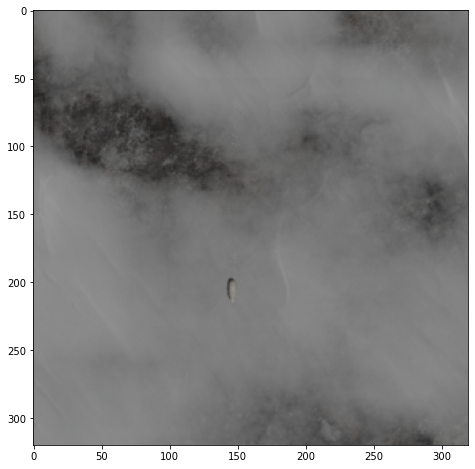

In [10]:
downloaded_dataset = sdk.download_dataset(datasetId=dataset_id)

zf = ZipFile(downloaded_dataset, 'r')
zf.extractall(downloaded_dataset.split('.')[0])
zf.close()

example_image = Image.open(glob.glob(downloaded_dataset.split('.')[0]+"/images/*.png")[0], 'r')
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(example_image))

Image Mask:

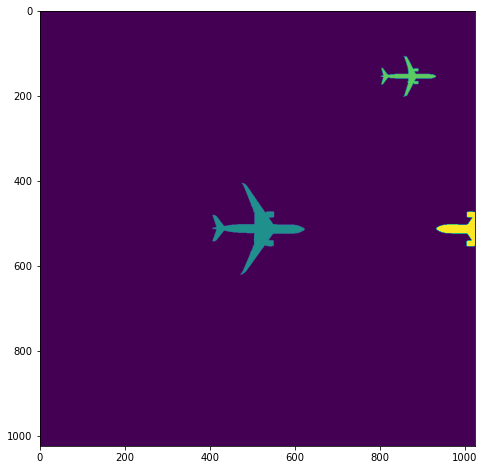

In [58]:
example_image_mask = Image.open(glob.glob(downloaded_dataset.split('.')[0]+"/masks/*.png")[0], 'r')
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(example_image_mask))

Create an image Annotated with 2d Bounding Boxes

In [37]:
from anatools import annotations

# Define data_dir here, default is the downloaded dataset
data_dir = "9f0df490-4db5-4b6a-a7f0-6086d296be45"

#Create the needed annotations directory
draw_dir = os.path.join(data_dir, 'draw_annotations')
if not os.path.isdir(draw_dir):
    os.mkdir(draw_dir)
    
annotations = annotations()
annotations.bounding_box_2d(image_path=glob.glob(downloaded_dataset.split('.')[0]+"/images/*.png")[0], 
                                out_dir=draw_dir, object_types=['Airbus_A350-900_QATAR', 'Embraer_E190_KLM'], line_thickness=2)

Image saved to 9f0df490-4db5-4b6a-a7f0-6086d296be45/draw_annotations/0000000025-1-Image-annotated-box_2d.png


In [42]:
# Download the dataset and the default object mapping files
# Other availailable mappings can be used: https://github.com/Rendered-ai/ana/tree/main/ana/channels/example/mappings
mappings_file_name = 'default.yml'
if os.path.isfile(mappings_file_name):
    print("Found mapping file " + mappings_file_name)
else:
    download_filename = wget.download('https://raw.githubusercontent.com/Rendered-ai/ana/main/ana/channels/example/mappings/default.yml')
    print("Downloaded " + download_filename)

100% [............................................................] 432 / 432Downloaded default.yml


In [56]:
from anatools import annotations

annotations().dump_yolo(datadir = data_dir, outdir = draw_dir, mapfile = mappings_file_name)
print("Created Annotation Labels")

AttributeError: 'annotations' object has no attribute 'dump_yolo'

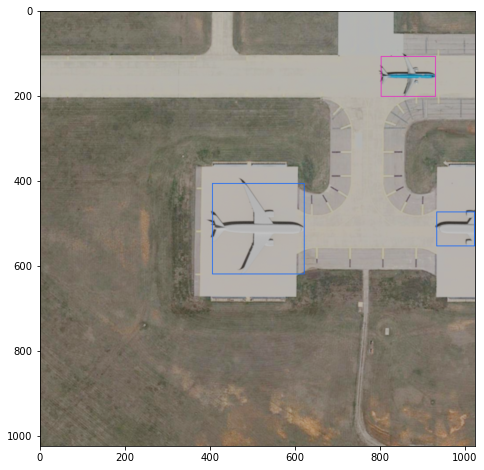

In [75]:
image_file_name = glob.glob(draw_dir+"/*2d.png")[0].split('/')[2]
annotated_image_2d = Image.open(draw_dir+"/"+image_file_name)
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(annotated_image_2d))